# Backpropagation

### Imports

In [16]:
import numpy as np 
from copy import deepcopy 

import matplotlib.pyplot as plt
%matplotlib inline

### Input and Output

In [2]:
x = np.array([[1, 1]])
y = np.array([[0]])

### Weights

In [6]:
W = [
    np.array([[-0.0053, 0.3793],
              [-0.5820, -0.5204],
              [-0.2723, 0.1896]], dtype=np.float32).T, 
    np.array([-0.0140, 0.5607, -0.0628], dtype=np.float32), 
    np.array([[ 0.1528, -0.1745, -0.1135]], dtype=np.float32).T, 
    np.array([-0.5516], dtype=np.float32)
]

In [8]:
W

[array([[-0.0053, -0.582 , -0.2723],
        [ 0.3793, -0.5204,  0.1896]], dtype=float32),
 array([-0.014 ,  0.5607, -0.0628], dtype=float32),
 array([[ 0.1528],
        [-0.1745],
        [-0.1135]], dtype=float32),
 array([-0.5516], dtype=float32)]

### Feedforward

In [9]:
def feed_forward(inputs, outputs, weights):

    pre_hidden = np.dot(inputs, weights[0]) + weights[1]
    hidden = 1 / (1 + np.exp(-pre_hidden))
    prediction = np.dot(hidden, weights[2]) + weights[3]

    mean_squared_error = np.mean(np.square(prediction - outputs))

    return mean_squared_error

### Backpropagation

In [11]:
def update_weights(inputs, outputs, weights, lr):

    original_weights = deepcopy(weights)
    temp_weights = deepcopy(weights)
    updated_weights = deepcopy(weights)

    original_loss = feed_forward(inputs, outputs, original_weights)

    for i, layer in enumerate(original_weights):

        for index, weight in np.ndenumerate(layer):

            temp_weights = deepcopy(weights)
            temp_weights[i][index] += 0.0001

            _loss_plus = feed_forward(inputs, outputs, temp_weights)

            grad = (_loss_plus - original_loss) / 0.0001

            updated_weights[i][index] -= grad * lr

    return updated_weights, original_loss

### Run for 100 Epochs

In [15]:
losses = []

for epoch in range(100):
    W, loss = update_weights(x, y, W, 0.01)
    losses.append(loss)

### Loss Plot

Text(0, 0.5, 'Loss')

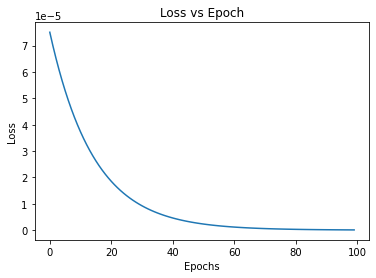

In [17]:
plt.plot(losses)
plt.title("Loss vs Epoch")
plt.xlabel("Epochs")
plt.ylabel("Loss")

### Final Updated Weights

In [18]:
W

[array([[ 0.01508036, -0.59091043, -0.2753959 ],
        [ 0.3996778 , -0.5293104 ,  0.1865038 ]], dtype=float32),
 array([ 0.00638036,  0.5517896 , -0.06589632], dtype=float32),
 array([[ 0.35352153],
        [-0.0516792 ],
        [ 0.0422102 ]], dtype=float32),
 array([-0.21452278], dtype=float32)]

### Prediction

In [23]:
pre_hidden = np.dot(x, W[0]) + W[1]
hidden = 1 / (1 + np.exp(-pre_hidden))
prediction = np.dot(hidden, W[2]) + W[3]

prediction

array([[-0.00029436]])